# Decision Trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length, width
y = iris.target

In [9]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [10]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [11]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

# Exercises - DecisionTree

In [73]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100000, noise=0.4)

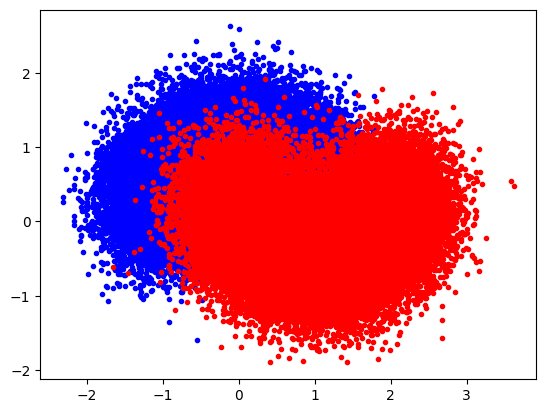

In [74]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "b.")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "r.")

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

params_grid = [{"max_leaf_nodes": [5, 10, 50, 100]}]

grid_search = GridSearchCV(param_grid=params_grid, scoring='accuracy', estimator=DecisionTreeClassifier(), cv=3)

In [103]:
grid_search.fit(X, y)
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_leaf_nodes=50)

In [104]:
y_pred = best_model.predict(X)

In [105]:
best_model.score(X, y)

0.86342

In [106]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(best_model, X, y, cv=3, scoring='accuracy')
score.mean()

0.8605400138719693

In [107]:
from sklearn.metrics import mean_squared_error

1 - mean_squared_error(y, y_pred)

0.86342

# Exercise - Random Forest Classifier

In [108]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000

mini_sets = []

ss = ShuffleSplit(n_splits=1000, random_state=42, train_size=100)

for train_id, test_id in ss.split(X_train):
    X_mini_train = X_train[train_id]
    y_mini_train = y_train[train_id]
    mini_sets.append((X_mini_train, y_mini_train))

In [112]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score
import numpy as np

forest = [clone(best_model) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

In [113]:
np.mean(accuracy_scores)

0.7887617499999999

In [115]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [118]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred)
y_pre

array([576, 625, 797, ..., 898, 961, 668])

In [117]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.86245